In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/kendrick_lamar.csv')

In [3]:
print(data.head())
print(data['Lyrics'].head())

                Track Title Release Title Release Subtitle  Track #  \
0       Fuck Your Ethnicity    Section.80              NaN        1   
1                   Hol' Up    Section.80              NaN        2   
2                  A.D.H.D.    Section.80              NaN        3   
3     No Make-Up (Her Vice)    Section.80              NaN        4   
4  Tammy's Song (Her Evils)    Section.80              NaN        5   

  Track Length (mm:ss)     Featuring Release Type  Release Type #  \
0                 3:44  Colin Munroe       Studio             1.0   
1                 2:53           NaN       Studio             1.0   
2                 3:35           NaN       Studio             1.0   
3                 3:55           NaN       Studio             1.0   
4                 2:41           NaN       Studio             1.0   

  Release Date  # of Tracks  ... Jaguar Maserati McLaren Mercedes-Benz  \
0     2 Jul 11         16.0  ...    NaN      NaN     NaN           1.0   
1     2 Ju

In [4]:
print(data['Lyrics'][0])

Gather 'round
 I'm glad everybody came out tonight
 As we stand on our neighborhood corner
 Know that this fire that's burning represents the passion you have
 Listen
 Keisha, Tammy, come up front
 I recognize all of you
 Every creed and color
 With that being said
 Fuck your ethnicity
 You understand that?
 We gon' talk about a lot of shit that concerns you, all of you
 Now everybody, throw your hands up high
 If you don't give a fuck, throw your hands up high
 Throw your hands up high
 Now, I don't give a fuck if you
 Black, white, Asian, Hispanic, goddammit
 That don't mean shit to me
 Fuck your ethnicity, nigga
 Fire burning inside my eyes, this the music that saved my life
 Y'all be calling it hip-hop, I be calling it hypnotize
 Yeah, hypnotize, trapped my body, but freed my mind
 What the fuck are you fighting for? Ain't nobody gon' win that war
 My details be retail, man, I got so much in store
 Racism is still alive, yellow tape and colored lines
 Fuck that, nigga, look at that

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishruth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stop_words = stopwords.words('english')
stop_words.extend(['nigga', 'niggas', 'shit', 'fuck', 'fucking',
                  'fucked', 'bitch', 'fuckin', 'go', 'got', 'gotta', 'oh', 'get', 'huh', 'yeah' ,'uh', 'man'])
vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=0.1)
tfidf = vectorizer.fit_transform(data['Lyrics'].values.astype('U'))
print("Term-Document matrix shape: ", tfidf.A.shape)
print("No. of words: ", len(vectorizer.get_feature_names_out()))


Term-Document matrix shape:  (237, 344)
No. of words:  344


In [8]:
from sklearn.decomposition import NMF

In [9]:
nmf = NMF(n_components=5, init="nndsvda")
W = nmf.fit_transform(tfidf)
print("Topic weight for each lyric - matrix shape: ", W.shape)

Topic weight for each lyric - matrix shape:  (237, 5)


In [10]:
H = nmf.components_
print("Word weight for each topic - matrix shape: ", H.shape)

Word weight for each topic - matrix shape:  (5, 344)


In [11]:
for i, topic in enumerate(H):
    print(f'Topic {i+1}:')
    print(" ".join(vectorizer.get_feature_names_out()[i] for i in topic.argsort() [:-21:-1]))

Topic 1:
said die one life want high time make inside back baby see two never live come tell take need good
Topic 2:
like top rock em ya back dot boy rap money jay yo new coast big dawg still pop west let
Topic 3:
feel like nobody god pussy everything way life stop kill feeling something talkin heart real always damn work em young
Topic 4:
love people wanna give keep time away real still us black run way need one feeling would night another money
Topic 5:
know mean day wanna let really kendrick girl new city say told hoes business compton used real bout talk today


In [12]:
topic_labels = ['life and death', 'hip-hop', 'sentiment', 'love', 'himself']
topic_values = W
topic_values.shape

(237, 5)

In [13]:
topic_data_frame = pd.DataFrame(topic_values, columns = topic_labels)
topic_data_frame

,life and death,hip-hop,sentiment,love,himself
0,0.165275,0.031867,0.005460,0.022525,0.102389
1,0.106899,0.116129,0.000000,0.000000,0.031754
2,0.145569,0.062336,0.082883,0.043782,0.071380
3,0.038869,0.000000,0.027522,0.113593,0.170881
4,0.097740,0.094916,0.000000,0.040996,0.110788
...,...,...,...,...,...
232,0.021928,0.045717,0.000000,0.000303,0.052634
233,0.050378,0.219983,0.000000,0.013437,0.019177
234,0.170242,0.082870,0.002959,0.037230,0.115407
235,0.139107,0.072568,0.000000,0.082663,0.000000


In [14]:
data = data.join(topic_data_frame)
data.head()

,Track Title,Release Title,Release Subtitle,Track #,Track Length (mm:ss),Featuring,Release Type,Release Type #,Release Date,# of Tracks,...,Range Rover,RAV4,Silverado,Toyota,Van,life and death,hip-hop,sentiment,love,himself
0,Fuck Your Ethnicity,Section.80,NaN,1,3:44,Colin Munroe,Studio,1.0,2 Jul 11,16.0,...,NaN,NaN,NaN,NaN,NaN,0.165275,0.031867,0.005460,0.022525,0.102389
1,Hol' Up,Section.80,NaN,2,2:53,NaN,Studio,1.0,2 Jul 11,16.0,...,NaN,1.0,NaN,NaN,NaN,0.106899,0.116129,0.000000,0.000000,0.031754
2,A.D.H.D.,Section.80,NaN,3,3:35,NaN,Studio,1.0,2 Jul 11,16.0,...,NaN,NaN,NaN,NaN,NaN,0.145569,0.062336,0.082883,0.043782,0.071380
3,No Make-Up (Her Vice),Section.80,NaN,4,3:55,NaN,Studio,1.0,2 Jul 11,16.0,...,NaN,NaN,NaN,NaN,NaN,0.038869,0.000000,0.027522,0.113593,0.170881
4,Tammy's Song (Her Evils),Section.80,NaN,5,2:41,NaN,Studio,1.0,2 Jul 11,16.0,...,NaN,NaN,NaN,NaN,NaN,0.097740,0.094916,0.000000,0.040996,0.110788


In [15]:
for i in topic_labels:
    data.loc[data[i] >= 0.1, i] = 1

for i in topic_labels:
    data.loc[data[i] < 0.1, i] = 0


data.head()

,Track Title,Release Title,Release Subtitle,Track #,Track Length (mm:ss),Featuring,Release Type,Release Type #,Release Date,# of Tracks,...,Range Rover,RAV4,Silverado,Toyota,Van,life and death,hip-hop,sentiment,love,himself
0,Fuck Your Ethnicity,Section.80,NaN,1,3:44,Colin Munroe,Studio,1.0,2 Jul 11,16.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0
1,Hol' Up,Section.80,NaN,2,2:53,NaN,Studio,1.0,2 Jul 11,16.0,...,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0
2,A.D.H.D.,Section.80,NaN,3,3:35,NaN,Studio,1.0,2 Jul 11,16.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0
3,No Make-Up (Her Vice),Section.80,NaN,4,3:55,NaN,Studio,1.0,2 Jul 11,16.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0
4,Tammy's Song (Her Evils),Section.80,NaN,5,2:41,NaN,Studio,1.0,2 Jul 11,16.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0


In [60]:
year_topics = data.groupby("Release Date").sum().reset_index()
for i in range(len(year_topics['Release Date'])):
    year = year_topics['Release Date'][i][-2:]
    year = '20' + year
    year_topics.loc[i, "Release Date"] = year
year_topics = year_topics[['Release Date', 'life and death',
             'hip-hop', 'sentiment', 'love', 'himself']]


In [63]:
year_topics = year_topics.sort_values('Release Date')

In [64]:
import matplotlib.pyplot as plt

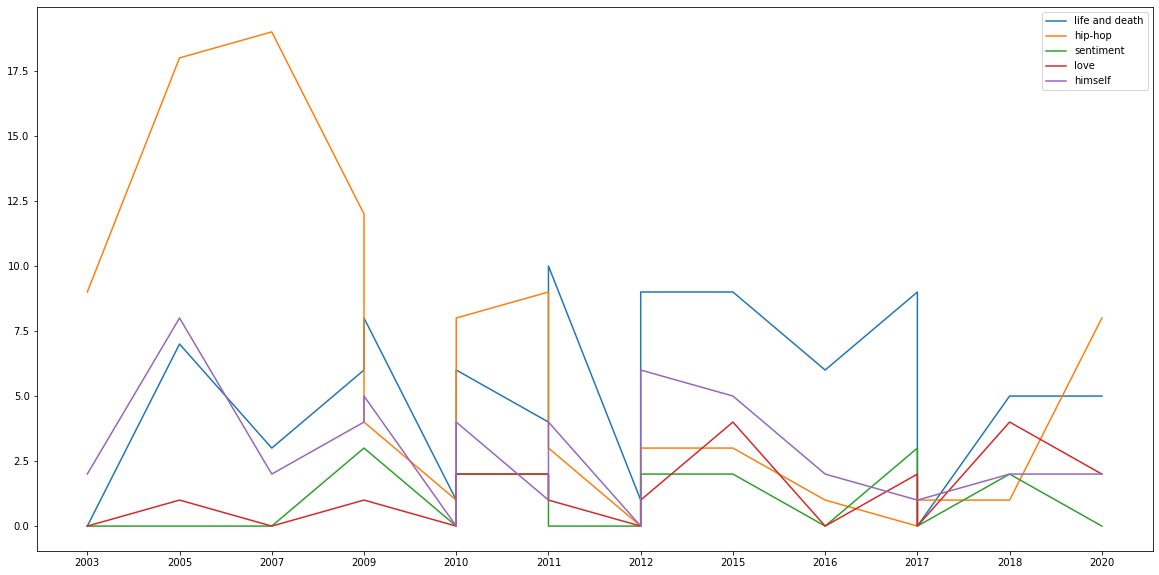

In [65]:
plt.figure(figsize=(20,10))
for i in topic_labels:
    plt.plot(year_topics['Release Date'], year_topics[i], label=i)
plt.legend()